In [111]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd
import sklearn
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random
np.random.seed(34)

In [112]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
dataset_path = '/content/drive/MyDrive/CMaps'
train_data_path = f'{dataset_path}/train_FD001.txt'
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21"]
train_data = pd.read_csv(train_data_path, sep= "\s+", header = None,names=columns )
print("DataFrame Shape:",train_data.shape)
missing_values = train_data.isnull().sum()
print("Missing Values:")
print(missing_values)




DataFrame Shape: (20631, 26)
Missing Values:
id          0
cycle       0
op1         0
op2         0
op3         0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64


In [169]:
train_data.head()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [172]:
print(train_data.shape)

(20631, 26)


In [115]:
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g
train = train_data.groupby('id').apply(add_rul)

<ipython-input-115-951723a8a72b>:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  train = train_data.groupby('id').apply(add_rul)


<Axes: >

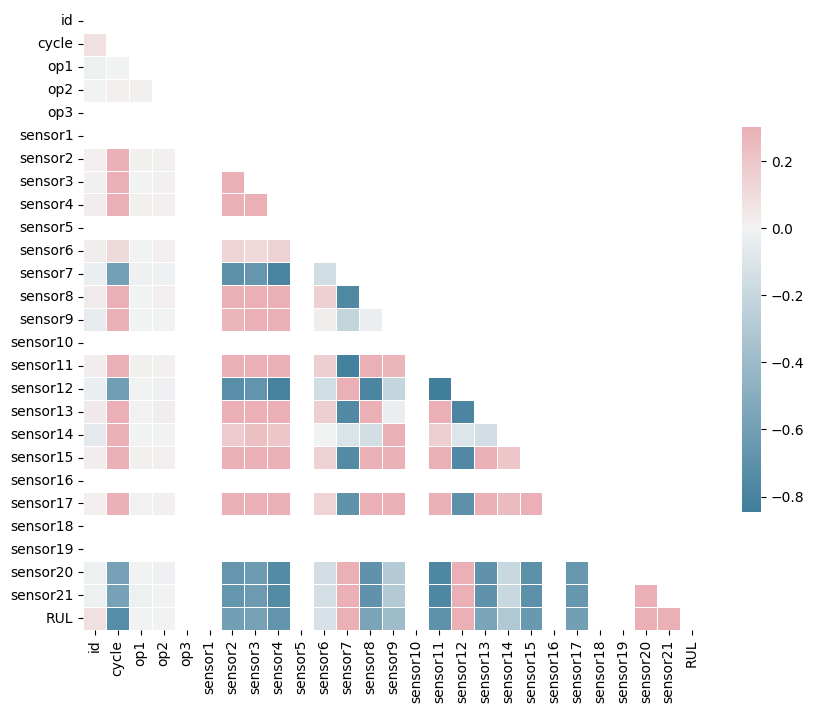

In [116]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [117]:
# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = train.copy()

# Select the target variable 'RUL' and the features of interest
features = ['op1', 'op2', 'op3', 'sensor1', 'sensor2', 'sensor3', 'sensor4',
            'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10',
            'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
            'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']
target_variable = 'RUL'

# Normalize the feature variables
scaler = StandardScaler()
X = data[features]
X_scaled = scaler.fit_transform(X)  # Normalize the feature data
y = data[target_variable]

# Rename the columns for readability in the summary
X_with_names = pd.DataFrame(X_scaled, columns=features)  # Remove 'const'

# Add a constant term (intercept) to the model
X_with_names = sm.add_constant(X_with_names)

# Create a Linear Regression model
model = sm.OLS(y, X_with_names)

# Fit the model to the training data
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                      -1.870
Model:                            OLS   Adj. R-squared:                 -1.872
Method:                 Least Squares   F-statistic:                    -839.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               1.00
Time:                        23:49:39   Log-Likelihood:            -1.2747e+05
No. Observations:               20631   AIC:                         2.550e+05
Df Residuals:                   20614   BIC:                         2.551e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
op1            0.1119      0.813      0.138      0.8

Columns with 0 SD dropped


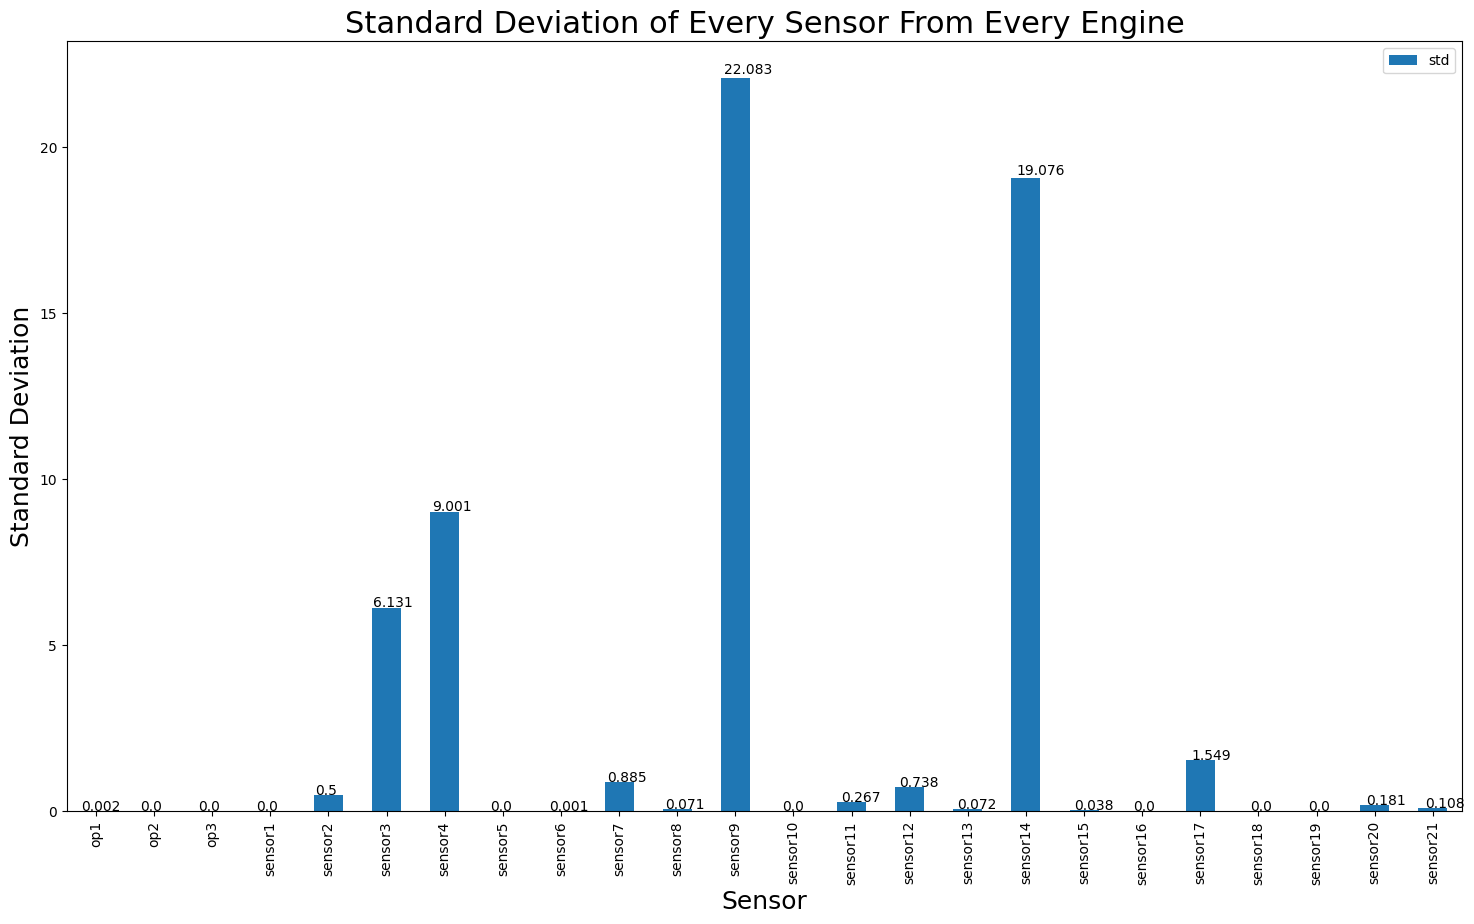

In [118]:
subset_stats = train_data.agg(['mean', 'std']).T[2:]
ax = subset_stats.plot.bar(figsize=(18, 10), y="std")
ax.set_title("Standard Deviation of Every Sensor From Every Engine", fontsize=22)
ax.set_xlabel("Sensor", fontsize=18)
ax.set_ylabel("Standard Deviation", fontsize=18)

# Annotate each bar with its standard deviation value
for p in ax.patches:
    # Round the standard deviation value to 3 decimal places
    annotation_text = str(round(p.get_height(), 3))

    # Position the annotation slightly above and to the right of the bar
    annotation_position = (p.get_x() * 1.005, p.get_height() * 1.005)

    # Add the annotation to the plot
    ax.annotate(annotation_text, annotation_position)


In [119]:
import numpy as np

def process_targets(data_length, early_rul=None):
    if early_rul is None:
        return np.arange(data_length - 1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:
            return np.arange(data_length - 1, -1, -1)
        else:
            return np.append(early_rul * np.ones(shape=(early_rul_duration,)), np.arange(early_rul - 1, -1, -1))

def process_input_data_with_targets(input_data, target_data=None, window_length=1, shift=1):
    num_batches = int(np.floor((len(input_data) - window_length) / shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.full((num_batches, window_length, num_features), np.nan)

    if target_data is None:
        for batch in range(num_batches):
            output_data[batch, :, :] = input_data[(0 + shift * batch):(0 + shift * batch + window_length), :]
        return output_data
    else:
        output_targets = np.full(num_batches, np.nan)
        for batch in range(num_batches):
            output_data[batch, :, :] = input_data[(0 + shift * batch):(0 + shift * batch + window_length), :]
            output_targets[batch] = target_data[(shift * batch + (window_length - 1))]
        return output_data, output_targets

def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows=1):
    max_num_test_batches = int(np.floor((len(test_data_for_an_engine) - window_length) / shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches - 1) * shift + window_length
    else:
        required_len = (num_test_windows - 1) * shift + window_length

    batched_test_data_for_an_engine = process_input_data_with_targets(
        test_data_for_an_engine[-required_len:, :],
        target_data=None,
        window_length=window_length,
        shift=shift
    )
    return batched_test_data_for_an_engine, min(max_num_test_batches, num_test_windows)


In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
test_data_path = f'{dataset_path}/test_FD001.txt'
true_rul_path = f'{dataset_path}/RUL_FD001.txt'
# Load data
test_data = pd.read_csv(test_data_path, sep="\s+", header=None, names=columns)
true_rul = pd.read_csv(true_rul_path, sep='\s+', header=None)

# Parameters
window_length = 30
shift = 1
early_rul = 125
num_test_windows = 5

# Columns to drop
columns_to_be_dropped = ['id', 'op1', 'op2', 'op3', 'sensor1', 'sensor5', 'sensor6', 'sensor7', 'sensor10',
                          'sensor16', 'sensor18', 'sensor19']

# Extract first columns
train_data_first_column = train_data["id"]
test_data_first_column = test_data["id"]

# Scale data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.drop(columns=columns_to_be_dropped))
test_data_scaled = scaler.transform(test_data.drop(columns=columns_to_be_dropped))

# Create dataframes
train_data = pd.DataFrame(data=np.c_[train_data_first_column, train_data_scaled])
test_data = pd.DataFrame(data=np.c_[test_data_first_column, test_data_scaled])

# Get unique machine counts
num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

# Process training data
processed_train_data = []
processed_train_targets = []

for i in range(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns=[0]).values

    if len(temp_train_data) < window_length:
        raise AssertionError("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))

    temp_train_targets = process_targets(data_length=temp_train_data.shape[0], early_rul=early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(
        temp_train_data, temp_train_targets, window_length=window_length, shift=shift
    )

    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

# Process test data
processed_test_data = []
num_test_windows_list = []

for i in range(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns=[0]).values

    if len(temp_test_data) < window_length:
        raise AssertionError("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))

    test_data_for_an_engine, num_windows = process_test_data(
        temp_test_data, window_length=window_length, shift=shift, num_test_windows=num_test_windows
    )

    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

# Display shapes
print("Processed training data shape:", processed_train_data.shape)
print("Processed training RULs shape:", processed_train_targets.shape)
print("Processed test data shape:", processed_test_data.shape)
print("True RUL shape:", true_rul.shape)


Processed training data shape: (17731, 30, 14)
Processed training RULs shape: (17731,)
Processed test data shape: (497, 30, 14)
True RUL shape: (100,)


In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

def create_compiled_model():
    model = Sequential([
        layers.LSTM(256, input_shape=(window_length, 14), return_sequences=True, activation="tanh"),
        layers.LSTM(128, activation="tanh", return_sequences=True),
        layers.LSTM(64, activation="tanh"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    return model



In [122]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 83)

In [162]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 256)           277504    
                                                                 
 lstm_16 (LSTM)              (None, 30, 128)           197120    
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                

In [123]:
print(processed_train_data.shape)
print(processed_val_data.shape)
print(processed_train_targets.shape)
print(processed_val_targets.shape)
print(true_rul.shape)

(14184, 30, 14)
(3547, 30, 14)
(14184,)
(3547,)
(100,)


In [124]:
from tensorflow.keras import callbacks
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = callbacks.LearningRateScheduler(scheduler, verbose=1)

model = create_compiled_model()
history = model.fit(
    processed_train_data, processed_train_targets,
    epochs=10,
    validation_data=(processed_val_data, processed_val_targets),
    callbacks=[lr_scheduler],
    batch_size=128,
    verbose=2
)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10
111/111 - 66s - loss: 3051.0122 - val_loss: 1759.7078 - lr: 0.0010 - 66s/epoch - 590ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
111/111 - 51s - loss: 1747.6793 - val_loss: 1756.3828 - lr: 0.0010 - 51s/epoch - 461ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
111/111 - 53s - loss: 1741.1545 - val_loss: 1653.6035 - lr: 0.0010 - 53s/epoch - 482ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/10
111/111 - 52s - loss: 616.4809 - val_loss: 310.1664 - lr: 0.0010 - 52s/epoch - 472ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/10
111/111 - 53s - loss: 262.9413 - val_loss: 197.0415 - lr: 0.0010 - 53s/epoch - 473ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.0009048374486155808.
Epoch 6/1

In [125]:
# Predict RUL for test data
rul_pred = model.predict(processed_test_data).reshape(-1)

# Split predictions into individual engines
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])

# Calculate the weighted average RUL for each engine
mean_pred_for_each_engine = [
    np.average(ruls_for_each_engine, weights=np.repeat(1 / num_windows, num_windows))
    for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)
]

# Calculate RMSE
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))

print("RMSE:", RMSE)


16/16 [==============================] - 3s 95ms/step
RMSE: 14.313829841369941


In [126]:
tf.keras.models.save_model(model, "FD001_LSTM_piecewise_RMSE_"+ str(np.round(RMSE, 4)) + ".h5")
#We will now compute the RMSE by taking only last example of each engine.

indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(preds_for_each_engine)[indices_of_last_examples]

RMSE_new = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE (Taking only last examples): ", RMSE_new)
def compute_s_score(rul_true, rul_pred):
    """
    Both rul_true and rul_pred should be 1D numpy arrays.
    """
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))
s_score = compute_s_score(true_rul, preds_for_last_example)
print("S-score: ", s_score)

RMSE (Taking only last examples):  14.766835291811162
S-score:  280.10231252596407


<ipython-input-126-c11554ff9415>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, "FD001_LSTM_piecewise_RMSE_"+ str(np.round(RMSE, 4)) + ".h5")


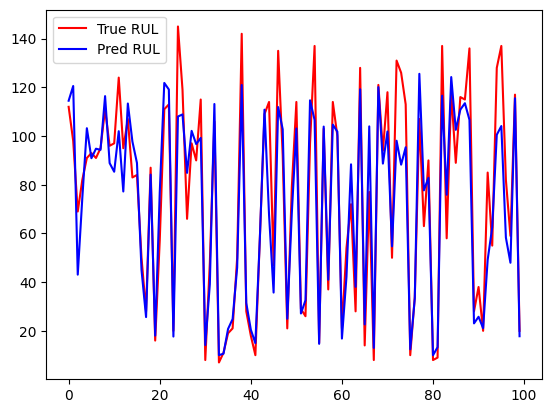

In [127]:
# Plot true and predicted RUL values
plt.plot(true_rul, label = "True RUL", color = "red")
plt.plot(preds_for_last_example, label = "Pred RUL", color = "blue")
plt.legend()
plt.show()

In [164]:
# Set a seed for random number generation
np.random.seed(42)  # Use any integer seed you prefer

import pandas as pd
import numpy as np
# Define the columns for engine ID and cycle (replace with actual column names)
engine_id_column = 'id'
cycle_column = 'cycle'
# Define initial engine ID and engine ID until which the attack should happen
engineId = 1
engineIdEnd = 37
# Define the cycle start (period of the attack)
cycleStart = 1
# Define the sensors where noise should be added
sensors = ['sensor2', 'sensor8', 'sensor14']  # Update with your column names
# Define the noise to be added (biased noise)
bound = [-0.06, -0.04, -0.02, -0.002,0]
rmse_plot=[]
for x in bound:
    df = pd.read_csv(test_data_path, sep="\s+", header=None, names=columns)
    # Iterate through engine IDs
    for l in range(engineId, engineIdEnd + 1):
        Table = df[(df[engine_id_column] == l) & (df[cycle_column] > cycleStart)].copy()
        # Iterate through selected sensors
        for sensor in sensors:
            # Generate random noise
            noise = np.random.uniform(-x, x)
            Table[sensor] = np.round(Table[sensor] * (1 + noise), 2)
        # Update the original DataFrame with modified values
        df.loc[(df[engine_id_column] == l) & (df[cycle_column] > cycleStart)] = Table
    # Parameters
    window_length = 30
    shift = 1
    early_rul = 125
    num_test_windows = 5
    columns_to_be_dropped = ['id', 'op1', 'op2', 'op3', 'sensor1', 'sensor5', 'sensor6', 'sensor7', 'sensor10',
                             'sensor16', 'sensor18', 'sensor19']
    new_test_data_first_column = df["id"]
    new_test_data_scaled = scaler.transform(df.drop(columns=columns_to_be_dropped))
    new_test_data = pd.DataFrame(data=np.c_[new_test_data_first_column, new_test_data_scaled])
    new_num_test_machines = len(new_test_data[0].unique())
    # Process test data
    new_processed_test_data = []
    new_num_test_windows_list = []
    for i in range(1, new_num_test_machines + 1):
        new_temp_test_data = new_test_data[new_test_data[0] == i].drop(columns=[0]).values
        if len(new_temp_test_data) < window_length:
            raise AssertionError(
                "Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))

        new_test_data_for_an_engine, new_num_windows = process_test_data(
            new_temp_test_data, window_length=window_length, shift=shift,num_test_windows=num_test_windows
        )
        new_processed_test_data.append(new_test_data_for_an_engine)
        new_num_test_windows_list.append(new_num_windows)
    new_processed_test_data = np.concatenate(new_processed_test_data)
    new_rul_pred = model.predict(new_processed_test_data).reshape(-1)
    new_preds_for_each_engine = np.split(new_rul_pred, np.cumsum(num_test_windows_list)[:-1])
    new_mean_pred_for_each_engine = [
        np.average(new_ruls_for_each_engine, weights=np.repeat(1 / new_num_windows, new_num_windows))
        for new_ruls_for_each_engine, new_num_windows in zip(new_preds_for_each_engine, new_num_test_windows_list)
    ]
    # Calculate RMSE
    RMSE = np.sqrt(mean_squared_error(true_rul,new_mean_pred_for_each_engine))
    rmse_plot.append(RMSE)
    print(f'RMSE for the bound {x} is: {RMSE}')


16/16 [==============================] - 3s 151ms/step
RMSE for the bound -0.06 is: 34.405310328590396
16/16 [==============================] - 2s 100ms/step
RMSE for the bound -0.04 is: 39.69423892929466
16/16 [==============================] - 1s 58ms/step
RMSE for the bound -0.02 is: 40.05883892335657
16/16 [==============================] - 1s 57ms/step
RMSE for the bound -0.002 is: 33.34105106091056
16/16 [==============================] - 1s 57ms/step
RMSE for the bound 0 is: 14.313829841369941


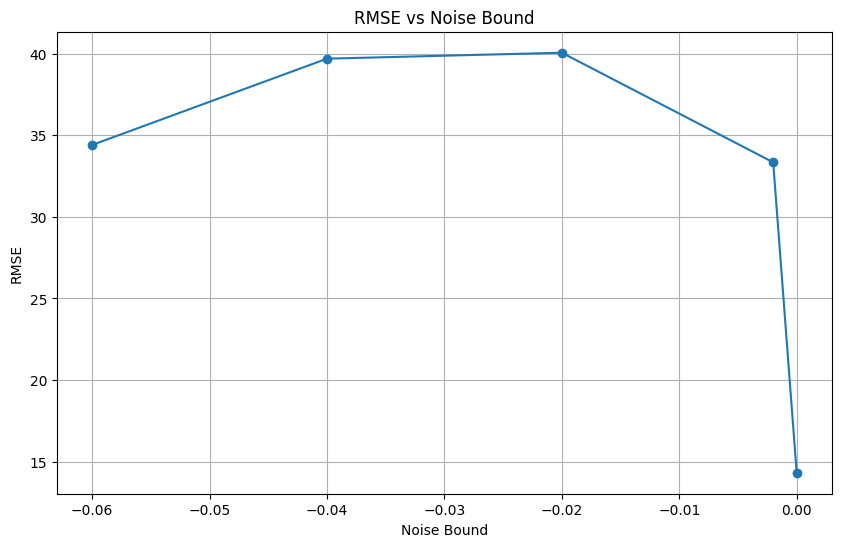

In [165]:
import matplotlib.pyplot as plt
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(bound, rmse_plot, marker='o')

# Adding title and labels
plt.title('RMSE vs Noise Bound')
plt.xlabel('Noise Bound')
plt.ylabel('RMSE')

# Show grid
plt.grid(True)

# Display the plot
plt.show()
